# Lab 8: Transfer Learning

## Feature Extraction Task

### Loading the dataset

with 4 classes: cats, dogs, humans, horses.

In [1]:
!curl -sL https://github.com/sagihaider/CE888_2021/raw/main/Lab_8/data.zip > data.zip
!unzip -qq data.zip

In [3]:
# Unzip training data
from zipfile import ZipFile
file_name = "/content/data.zip"
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('done')

done


In [4]:
import os
# Get all the paths
data_dir_list = os.listdir('/content/data')

path, dirs, files = next(os.walk("/content/data/cats"))
file_count = len(files)
print(file_count)

path, dirs, files = next(os.walk("/content/data/dogs"))
file_count = len(files)
print(file_count)

path, dirs, files = next(os.walk("/content/data/horses"))
file_count = len(files)
print(file_count)

path, dirs, files = next(os.walk("/content/data/Humans"))
file_count = len(files)
print(file_count)

202
202
202
202


In [5]:
# Make new base directory
base_dir = '/content/4_classes'
os.mkdir(base_dir)

### Splitting dataset into train, validation, and test sets

In [6]:
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [7]:
import shutil
fnames = ['cat.{}.jpg'.format(i) for i in range(1, 101)]
for fname in fnames:
    src = os.path.join('/content/data/cats', fname)
    dst = os.path.join(train_dir, fname)
    #print(src,dst)
    shutil.copyfile(src, dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(101, 152)]
for fname in fnames:
    src = os.path.join('/content/data/cats', fname)
    dst = os.path.join(validation_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(152, 203)]
for fname in fnames:
    src = os.path.join('/content/data/cats', fname)
    dst = os.path.join(test_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1, 101)]
for fname in fnames:
    src = os.path.join('/content/data/dogs', fname)
    dst = os.path.join(train_dir, fname)
    #print(src,dst)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(101, 152)]
for fname in fnames:
    src = os.path.join('/content/data/dogs', fname)
    dst = os.path.join(validation_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(152, 203)]
for fname in fnames:
    src = os.path.join('/content/data/dogs', fname)
    dst = os.path.join(test_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['horse-{}.jpg'.format(i) for i in range(1, 101)]
for fname in fnames:
    src = os.path.join('/content/data/horses', fname)
    dst = os.path.join(train_dir, fname)
    #print(src,dst)
    shutil.copyfile(src, dst)
    
fnames = ['horse-{}.jpg'.format(i) for i in range(101, 152)]
for fname in fnames:
    src = os.path.join('/content/data/horses', fname)
    dst = os.path.join(validation_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['horse-{}.jpg'.format(i) for i in range(152, 203)]
for fname in fnames:
    src = os.path.join('/content/data/horses', fname)
    dst = os.path.join(test_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['rider-{}.jpg'.format(i) for i in range(1, 101)]
for fname in fnames:
    src = os.path.join('/content/data/Humans', fname)
    dst = os.path.join(train_dir, fname)
    #print(src,dst)
    shutil.copyfile(src, dst)
    
fnames = ['rider-{}.jpg'.format(i) for i in range(101, 152)]
for fname in fnames:
    src = os.path.join('/content/data/Humans', fname)
    dst = os.path.join(validation_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['rider-{}.jpg'.format(i) for i in range(152, 203)]
for fname in fnames:
    src = os.path.join('/content/data/Humans', fname)
    dst = os.path.join(test_dir, fname)
    shutil.copyfile(src, dst)

In [8]:
import cv2
import numpy as np
from random import shuffle

IMG_SIZE = 224
LR = 1e-4

In [9]:
def label_img(img):
    if 'dog' in img: return 0
    elif 'cat' in img: return 1
    elif 'rider' in img: return 2
    elif 'horse' in img: return 3

In [10]:
def createDataSplitSet(datapath):
    X=[]
    y=[]

    for img in os.listdir(datapath):
        label = label_img(img)
        # print(label)
        path = os.path.join(datapath, img)
        image = cv2.resize(cv2.imread(path), (IMG_SIZE, IMG_SIZE))
        image = cv2.normalize(image, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)

        X.append(np.array(image))
        y.append(label)

    return np.array(X), np.array(y)

In [11]:
train_X, train_y = createDataSplitSet(train_dir)
print(train_X.shape)

val_X, val_y = createDataSplitSet(validation_dir)
print(val_X.shape)

test_X, test_y = createDataSplitSet(test_dir)
print(test_X.shape)

(400, 224, 224, 3)
(204, 224, 224, 3)
(204, 224, 224, 3)


### Extracting features from InceptionV3 model and evaluating it

In [14]:
## InceptionV3

from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Model

img_input = Input(shape=(IMG_SIZE, IMG_SIZE, 3))

In [15]:
model = InceptionV3(
    include_top=True,
    weights="imagenet",
    input_tensor=img_input,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax")
model.summary()

96116736/96112376 [==============================] - 1s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_4 (Conv2D)               (None, 111, 111, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_4 (BatchNor (None, 111, 111, 32) 96          conv2d_4[0][0]                   
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization_4[0][0]      
______________________

In [16]:
last_layer = model.get_layer('avg_pool').output
out = Dense(4, activation='softmax', name='output')(last_layer)  ## 4 classes
model = Model(img_input, out)

for layer in model.layers[:-1]:
	layer.trainable = False

model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_4 (Conv2D)               (None, 111, 111, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_4 (BatchNor (None, 111, 111, 32) 96          conv2d_4[0][0]                   
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization_4[0][0]      
______________________________________________________________________________________________

In [18]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [19]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
my_callbacks = [
    EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True),
    ModelCheckpoint(filepath='InceptionV3_model.h5', save_best_only=True),
]

In [20]:
history = model.fit(train_X, train_y,
                               batch_size=10,
                               epochs=10, 
                               validation_data=(val_X, val_y),
                               callbacks=my_callbacks)

Epoch 1/10
40/40 [==============================] - 66s 2s/step - loss: 1.1754 - acc: 0.5778 - val_loss: 0.2499 - val_acc: 0.9363
Epoch 2/10
40/40 [==============================] - 61s 2s/step - loss: 0.1610 - acc: 0.9611 - val_loss: 0.1499 - val_acc: 0.9461
Epoch 3/10
40/40 [==============================] - 61s 2s/step - loss: 0.1024 - acc: 0.9625 - val_loss: 0.1213 - val_acc: 0.9559
Epoch 4/10
40/40 [==============================] - 61s 2s/step - loss: 0.0501 - acc: 0.9992 - val_loss: 0.1195 - val_acc: 0.9657
Epoch 5/10
40/40 [==============================] - 60s 2s/step - loss: 0.0451 - acc: 0.9992 - val_loss: 0.1173 - val_acc: 0.9657
Epoch 6/10
40/40 [==============================] - 60s 2s/step - loss: 0.0266 - acc: 1.0000 - val_loss: 0.0979 - val_acc: 0.9755
Epoch 7/10
40/40 [==============================] - 60s 2s/step - loss: 0.0193 - acc: 1.0000 - val_loss: 0.1120 - val_acc: 0.9706
Epoch 8/10
40/40 [==============================] - 59s 1s/step - loss: 0.0181 - acc: 1.00

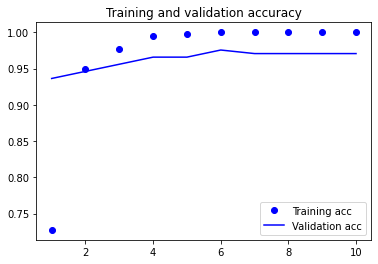

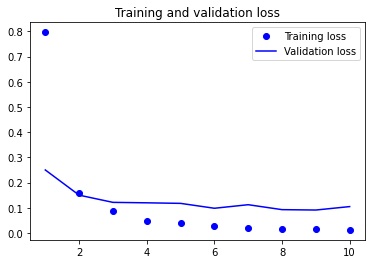

In [25]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [22]:
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder

## Test Accuracy
predictions = model.predict(test_X)
ypred = predictions > 0.5
enc = OneHotEncoder(handle_unknown='ignore')
test_y_trans = enc.fit_transform(test_y.reshape(-1, 1))
test_acc = accuracy_score(test_y_trans, ypred)

from sklearn.metrics import precision_recall_fscore_support, roc_auc_score

precision, recall, f1score, _ = precision_recall_fscore_support(test_y_trans, ypred)

print("Train Accuracy:\t", acc[-1])
print("Val Accuracy:\t", val_acc[-1])
print("Test Accuracy:\t", test_acc)
print("Precision:\t", precision)
print("Recall:\t\t", recall)
print("F1 Score:\t", f1score)

Train Accuracy:	 1.0
Val Accuracy:	 0.970588207244873
Test Accuracy:	 0.9607843137254902
Precision:	 [0.91071429 1.         1.         0.96      ]
Recall:		 [1.         0.98039216 0.92156863 0.94117647]
F1 Score:	 [0.95327103 0.99009901 0.95918367 0.95049505]
